In [25]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================
# ‡∏ï‡∏≤‡∏° config ‡∏Ç‡∏≠‡∏á‡∏£‡∏∞‡∏ö‡∏ö‡∏à‡∏£‡∏¥‡∏á
# ==============================
TICKERS = ["AEP", "DUK", "SO", "ED", "EXC"]
EXOG_TICKERS = {"Oil": "CL=F", "Gas": "NG=F", "XLU": "XLU"}
PERIOD = "5y"


In [26]:
def ensure_datetime_freq(series: pd.Series | pd.DataFrame, use_bdays=True):
    """‡∏Ñ‡∏±‡∏î‡∏•‡∏≠‡∏Å logic ‡∏à‡∏≤‡∏Å forecast.py ‡πÄ‡∏û‡∏∑‡πà‡∏≠ align ‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà‡πÄ‡∏õ‡πá‡∏ô‡∏ß‡∏±‡∏ô‡∏ó‡∏≥‡∏Å‡∏≤‡∏£ (BusinessDays)"""
    s = series.copy()
    if not isinstance(s.index, pd.DatetimeIndex):
        s.index = pd.to_datetime(s.index, errors="coerce")
    s = s[~s.index.isna()].sort_index()
    if len(s) == 0:
        return s
    inferred = pd.infer_freq(s.index)
    if inferred is None:
        full_idx = pd.bdate_range(s.index.min(), s.index.max()) if use_bdays else pd.date_range(s.index.min(), s.index.max())
        s = s.reindex(full_idx).ffill()
    return s


In [27]:
# ‚úÖ ‡∏î‡∏∂‡∏á‡∏£‡∏≤‡∏Ñ‡∏≤‡∏õ‡∏¥‡∏î
data = pd.DataFrame()

# ‡∏´‡∏∏‡πâ‡∏ô‡∏´‡∏•‡∏±‡∏Å
for t in TICKERS:
    df = yf.download(t, period=PERIOD, progress=False, auto_adjust=True)
    s = df["Close"].dropna()
    s = ensure_datetime_freq(s)
    data[t] = s

# ‡∏ï‡∏±‡∏ß‡πÅ‡∏õ‡∏£‡∏†‡∏≤‡∏¢‡∏ô‡∏≠‡∏Å (exog)
for name, symbol in EXOG_TICKERS.items():
    df = yf.download(symbol, period=PERIOD, progress=False, auto_adjust=True)
    s = df["Close"].dropna()
    s = ensure_datetime_freq(s)
    data[name] = s

# align index ‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î
data = data.reindex(pd.bdate_range(data.index.min(), data.index.max())).ffill()
data.tail()


AEP         DUK         SO          ED        EXC  \
2025-10-07  118.160004  125.559998  96.419998  100.040001  46.790001   
2025-10-08  118.190002  125.230003  96.180000  100.830002  46.619999   
2025-10-09  116.910004  124.709999  96.129997  100.800003  46.660000   
2025-10-10  117.040001  127.019997  98.290001  102.389999  47.070000   
2025-10-13  117.334999  126.754997  98.129997  101.029999  46.930000   

                  Oil    Gas        XLU  
2025-10-07  61.730000  3.498  90.180000  
2025-10-08  62.549999  3.333  90.800003  
2025-10-09  61.509998  3.269  90.570000  
2025-10-10  58.900002  3.106  90.199997  
2025-10-13  59.759998  3.116  91.099998

In [28]:
returns = data.pct_change().dropna()
corr = returns.corr()
corr


AEP       DUK        SO        ED       EXC       Oil       Gas  \
AEP  1.000000  0.808136  0.791330  0.771376  0.732154  0.011512  0.063872   
DUK  0.808136  1.000000  0.820347  0.829220  0.728343 -0.008747  0.048054   
SO   0.791330  0.820347  1.000000  0.791542  0.722550  0.015260  0.039412   
ED   0.771376  0.829220  0.791542  1.000000  0.704924 -0.024707  0.036388   
EXC  0.732154  0.728343  0.722550  0.704924  1.000000  0.036026  0.048699   
Oil  0.011512 -0.008747  0.015260 -0.024707  0.036026  1.000000  0.073303   
Gas  0.063872  0.048054  0.039412  0.036388  0.048699  0.073303  1.000000   
XLU  0.825536  0.834279  0.828986  0.786217  0.779351  0.061708  0.078027   

          XLU  
AEP  0.825536  
DUK  0.834279  
SO   0.828986  
ED   0.786217  
EXC  0.779351  
Oil  0.061708  
Gas  0.078027  
XLU  1.000000

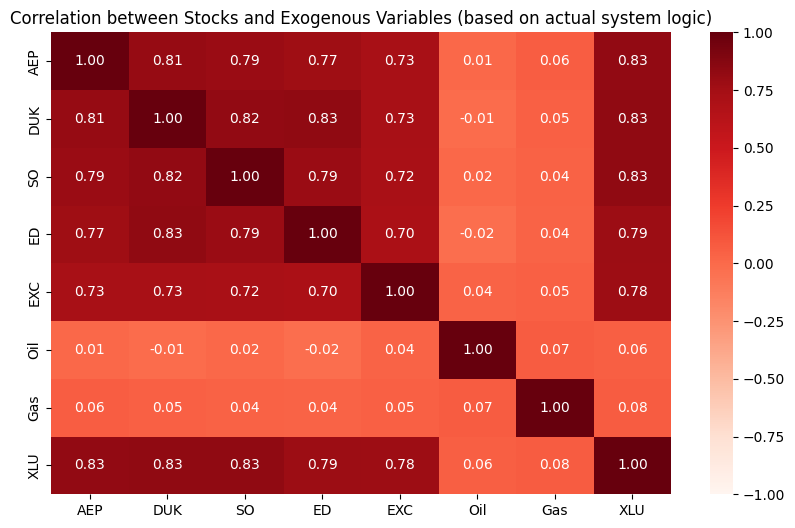

In [29]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="Reds", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation between Stocks and Exogenous Variables (based on actual system logic)")
plt.show()


In [30]:
corr_subset = corr.loc[TICKERS, EXOG_TICKERS.keys()]
corr_subset.style.background_gradient(cmap="coolwarm", axis=None)


In [31]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ===========================
# Config ‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô‡∏£‡∏∞‡∏ö‡∏ö‡∏à‡∏£‡∏¥‡∏á
# ===========================
TICKERS = ["AEP", "DUK", "SO", "ED", "EXC"]
EXOG_TICKERS = {"Oil": "CL=F", "Gas": "NG=F", "XLU": "XLU"}
PERIOD = "5y"

def ensure_datetime_freq(series: pd.Series | pd.DataFrame, use_bdays=True):
    s = series.copy()
    if not isinstance(s.index, pd.DatetimeIndex):
        s.index = pd.to_datetime(s.index, errors="coerce")
    s = s[~s.index.isna()].sort_index()
    if len(s) == 0:
        return s
    inferred = pd.infer_freq(s.index)
    if inferred is None:
        full_idx = pd.bdate_range(s.index.min(), s.index.max()) if use_bdays else pd.date_range(s.index.min(), s.index.max())
        s = s.reindex(full_idx).ffill()
    return s


In [32]:
data = pd.DataFrame()

# ‡∏´‡∏∏‡πâ‡∏ô Utilities
for t in TICKERS:
    df = yf.download(t, period=PERIOD, progress=False, auto_adjust=True)
    s = df["Close"].dropna()
    s = ensure_datetime_freq(s)
    data[t] = s

# ‡∏ï‡∏±‡∏ß‡πÅ‡∏õ‡∏£‡∏†‡∏≤‡∏¢‡∏ô‡∏≠‡∏Å (Oil, Gas, XLU)
for name, sym in EXOG_TICKERS.items():
    df = yf.download(sym, period=PERIOD, progress=False, auto_adjust=True)
    s = df["Close"].dropna()
    s = ensure_datetime_freq(s)
    data[name] = s

data = data.reindex(pd.bdate_range(data.index.min(), data.index.max())).ffill()
data.tail()


AEP         DUK         SO          ED        EXC  \
2025-10-07  118.160004  125.559998  96.419998  100.040001  46.790001   
2025-10-08  118.190002  125.230003  96.180000  100.830002  46.619999   
2025-10-09  116.910004  124.709999  96.129997  100.800003  46.660000   
2025-10-10  117.040001  127.019997  98.290001  102.389999  47.070000   
2025-10-13  117.334999  126.754997  98.129997  101.029999  46.930000   

                  Oil    Gas        XLU  
2025-10-07  61.730000  3.498  90.180000  
2025-10-08  62.549999  3.333  90.800003  
2025-10-09  61.509998  3.269  90.570000  
2025-10-10  58.900002  3.106  90.199997  
2025-10-13  59.759998  3.113  91.099998

In [33]:
# ‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏™‡∏≥‡πÄ‡∏ô‡∏≤ exog smoothing
data_smooth = data.copy()

# üîπ ‡∏ó‡∏≥ rolling 5 ‡∏ß‡∏±‡∏ô + normalize ‡πÄ‡∏â‡∏û‡∏≤‡∏∞ Oil, Gas
for col in ["Oil", "Gas"]:
    s = data_smooth[col]
    s = (s - s.mean()) / (s.std() + 1e-6)
    s = s.rolling(window=5).mean().bfill()
    data_smooth[col] = s

# üîπ XLU ‡πÉ‡∏ä‡πâ‡∏ï‡∏£‡∏á ‡πÜ (‡πÑ‡∏°‡πà‡πÅ‡∏ï‡∏∞)


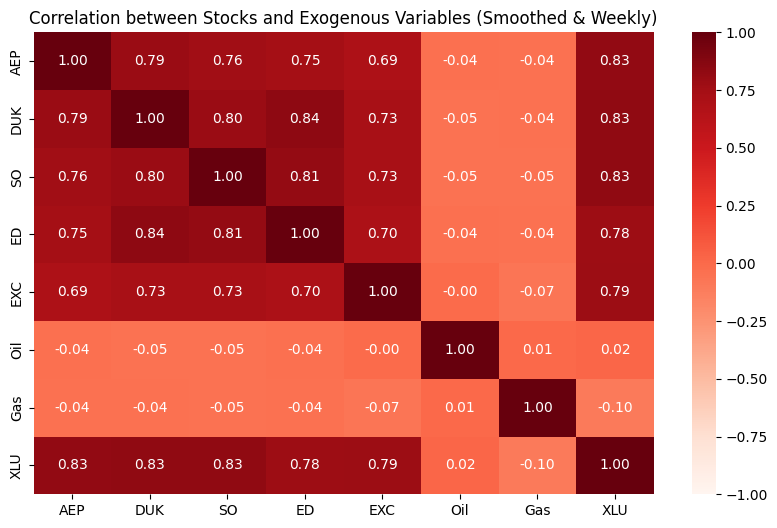

In [34]:
weekly = data_smooth.resample("W").last().pct_change().dropna()
corr = weekly.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="Reds", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation between Stocks and Exogenous Variables (Smoothed & Weekly)")
plt.show()


In [35]:
corr_subset = corr.loc[TICKERS, EXOG_TICKERS.keys()]
corr_subset.style.background_gradient(cmap="coolwarm", axis=None)


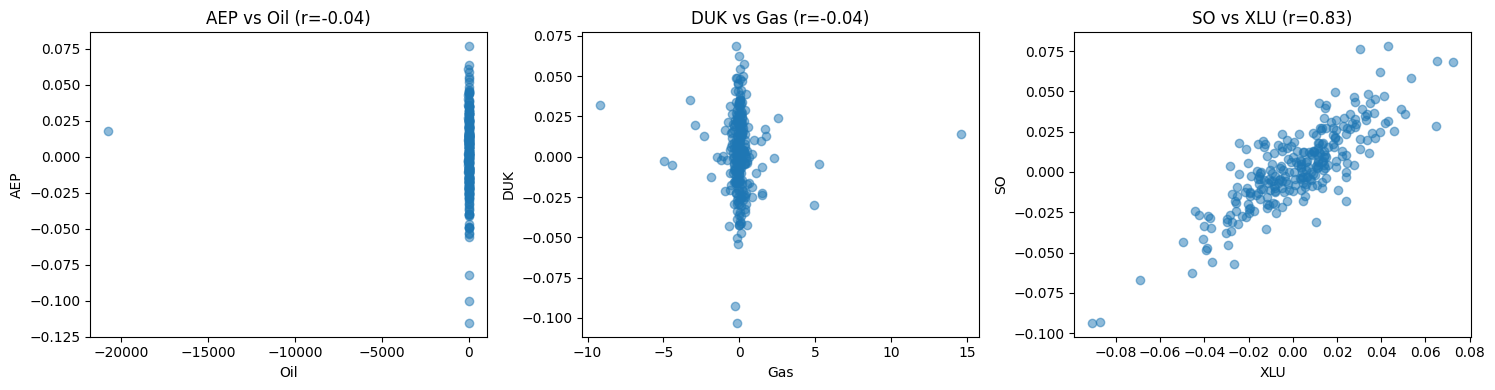

In [36]:
pairs = [("AEP", "Oil"), ("DUK", "Gas"), ("SO", "XLU")]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, (stk, exog) in enumerate(pairs):
    axes[i].scatter(weekly[exog], weekly[stk], alpha=0.5)
    axes[i].set_title(f"{stk} vs {exog} (r={corr.loc[stk, exog]:.2f})")
    axes[i].set_xlabel(exog)
    axes[i].set_ylabel(stk)
plt.tight_layout()
plt.show()


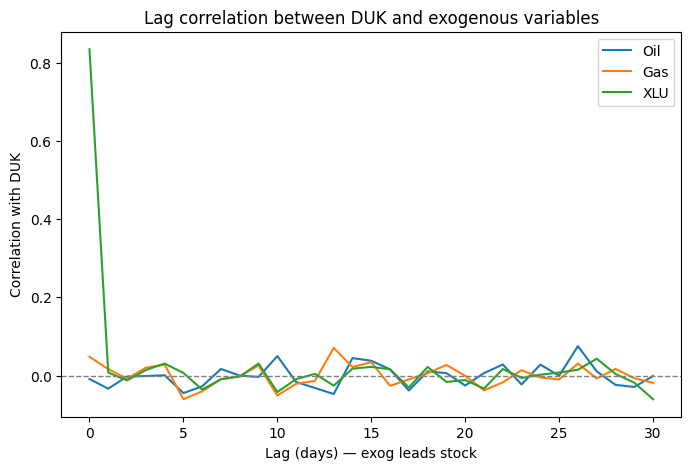

In [37]:
target = "DUK"   # ‡∏´‡∏£‡∏∑‡∏≠‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡πÄ‡∏õ‡πá‡∏ô AEP, SO, ED, EXC ‡πÑ‡∏î‡πâ
max_lag = 30     # ‡∏î‡∏π‡∏¢‡πâ‡∏≠‡∏ô‡∏´‡∏•‡∏±‡∏á‡πÑ‡∏î‡πâ‡∏ñ‡∏∂‡∏á 30 ‡∏ß‡∏±‡∏ô

corrs = {"Oil": [], "Gas": [], "XLU": []}
lags = range(0, max_lag + 1)

returns = data.pct_change().dropna()

for exog in corrs.keys():
    for lag in lags:
        shifted = returns[exog].shift(lag)
        c = returns[target].corr(shifted)
        corrs[exog].append(c)

plt.figure(figsize=(8,5))
for exog, vals in corrs.items():
    plt.plot(lags, vals, label=exog)
plt.axhline(0, color="gray", linestyle="--", linewidth=1)
plt.xlabel("Lag (days) ‚Äî exog leads stock")
plt.ylabel(f"Correlation with {target}")
plt.title(f"Lag correlation between {target} and exogenous variables")
plt.legend()
plt.show()


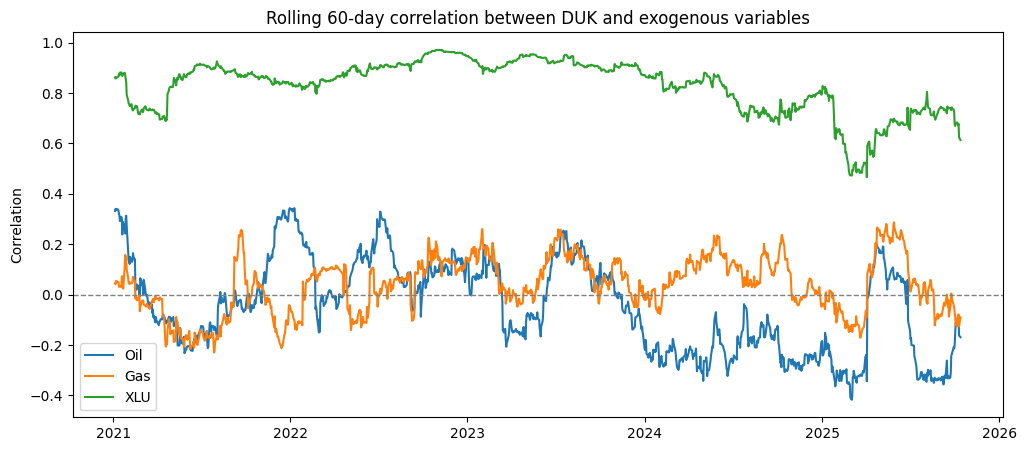

In [38]:
import seaborn as sns

target = "DUK"
window = 60  # 60 ‡∏ß‡∏±‡∏ô

roll_corr = pd.DataFrame({
    exog: data[target].pct_change().rolling(window).corr(data[exog].pct_change())
    for exog in ["Oil", "Gas", "XLU"]
}).dropna()

plt.figure(figsize=(12,5))
for exog in roll_corr.columns:
    plt.plot(roll_corr.index, roll_corr[exog], label=exog)
plt.axhline(0, color="gray", linestyle="--", linewidth=1)
plt.legend()
plt.title(f"Rolling 60-day correlation between {target} and exogenous variables")
plt.ylabel("Correlation")
plt.show()


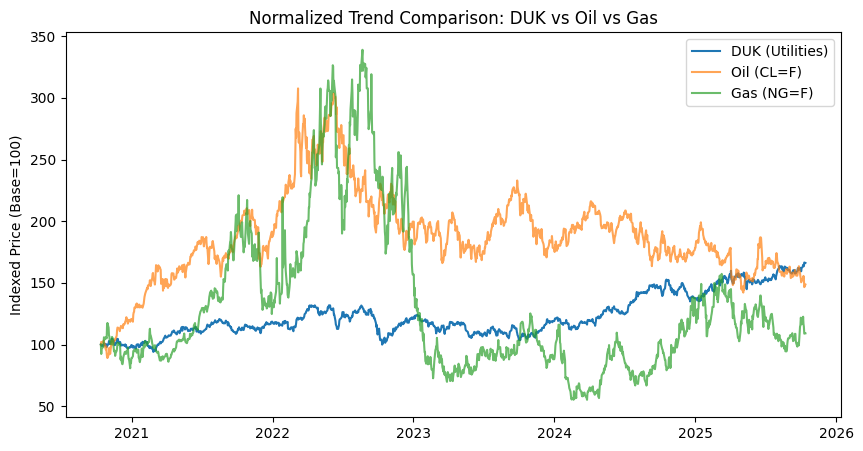

In [39]:
plt.figure(figsize=(10,5))
plt.plot(data["DUK"]/data["DUK"].iloc[0]*100, label="DUK (Utilities)")
plt.plot(data["Oil"]/data["Oil"].iloc[0]*100, label="Oil (CL=F)", alpha=0.7)
plt.plot(data["Gas"]/data["Gas"].iloc[0]*100, label="Gas (NG=F)", alpha=0.7)
plt.title("Normalized Trend Comparison: DUK vs Oil vs Gas")
plt.ylabel("Indexed Price (Base=100)")
plt.legend()
plt.show()


In [40]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

TICKERS = ["AEP", "DUK", "SO", "ED", "EXC"]
EXOG_TICKERS = {"Oil": "CL=F", "Gas": "NG=F", "XLU": "XLU"}

PERIOD = "5y"

def ensure_datetime_freq(series: pd.Series | pd.DataFrame, use_bdays=True):
    s = series.copy()
    if not isinstance(s.index, pd.DatetimeIndex):
        s.index = pd.to_datetime(s.index, errors="coerce")
    s = s[~s.index.isna()].sort_index()
    if len(s) == 0:
        return s
    inferred = pd.infer_freq(s.index)
    if inferred is None:
        full_idx = pd.bdate_range(s.index.min(), s.index.max()) if use_bdays else pd.date_range(s.index.min(), s.index.max())
        s = s.reindex(full_idx).ffill()
    return s

data = pd.DataFrame()

for t in TICKERS:
    df = yf.download(t, period=PERIOD, progress=False, auto_adjust=True)
    s = df["Close"].dropna()
    s = ensure_datetime_freq(s)
    data[t] = s

for name, sym in EXOG_TICKERS.items():
    df = yf.download(sym, period=PERIOD, progress=False, auto_adjust=True)
    s = df["Close"].dropna()
    s = ensure_datetime_freq(s)
    data[name] = s

data = data.reindex(pd.bdate_range(data.index.min(), data.index.max())).ffill()
returns = data.pct_change().dropna()


In [41]:
max_lag = 30
corr_matrix = pd.DataFrame(index=TICKERS, columns=EXOG_TICKERS.keys())

for stock in TICKERS:
    for exog in EXOG_TICKERS.keys():
        best_corr = -999
        best_lag = 0
        for lag in range(0, max_lag + 1):
            shifted = returns[exog].shift(lag)
            c = returns[stock].corr(shifted)
            if abs(c) > abs(best_corr):
                best_corr, best_lag = c, lag
        corr_matrix.loc[stock, exog] = best_corr

corr_matrix = corr_matrix.astype(float)
corr_matrix


Oil    Gas    XLU
AEP -999.0 -999.0 -999.0
DUK -999.0 -999.0 -999.0
SO  -999.0 -999.0 -999.0
ED  -999.0 -999.0 -999.0
EXC -999.0 -999.0 -999.0

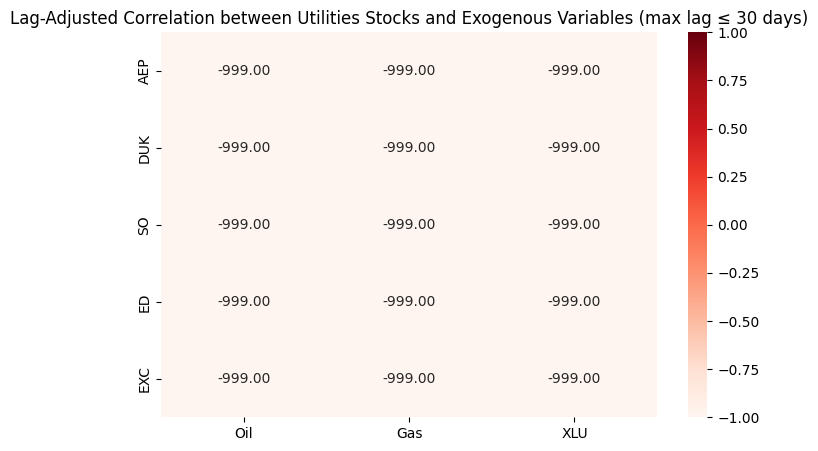

In [42]:
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix, annot=True, cmap="Reds", vmin=-1, vmax=1, fmt=".2f")
plt.title("Lag-Adjusted Correlation between Utilities Stocks and Exogenous Variables (max lag ‚â§ 30 days)")
plt.show()
